In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:20.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-0.95e20,-1.35e20,-1.55e20,-2.2e20]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.4,0.6,0.7,0.8]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=9.0-1.5*x*x
    Dv=4.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end


bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX3],var0)#


#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])

tauTOTTx=tau_electron_B([tauAC,tauII2,tauPOP2],vartau0)#
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))

numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))
#@time (sigmas,seebecks)=sigmaArray(bndstTx,Ts,xs,numofn,tauTOTTx,xmax)
x=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 35.710080 seconds (188.95 M allocations: 32.798 GiB, 7.72% gc time)


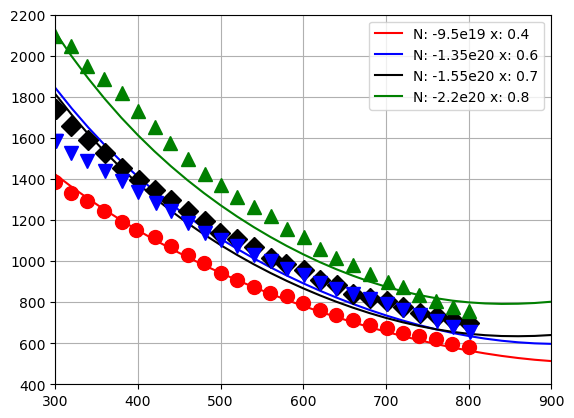

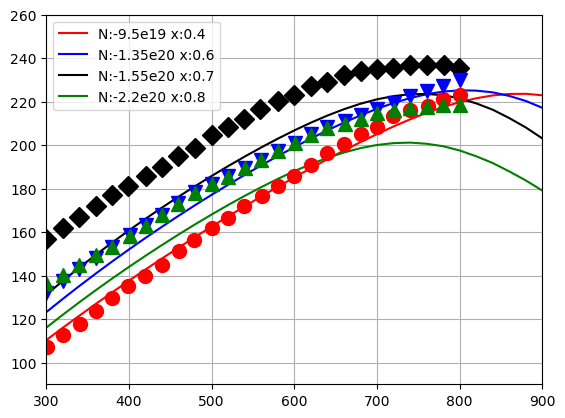

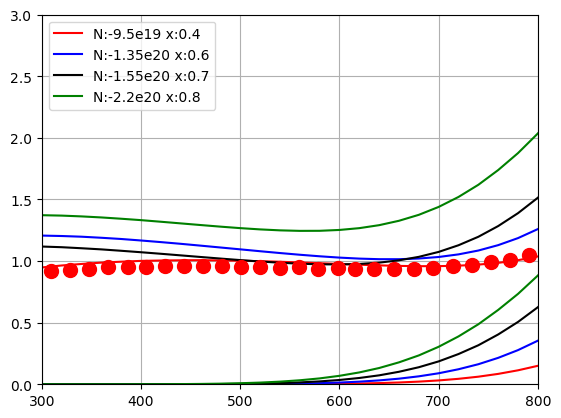

In [4]:
colors=["r","b","k","g","m","y","c"]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        k+=1
        #push!(plots,p)       
   # end
end
plot(LMg2SiSn04TE,LMg2SiSn04E, linestyle="None",marker="o",markersize=10,color="r")
plot(LMg2SiSn07TE,LMg2SiSn07E, linestyle="None",marker="D",markersize=10,color="k")
plot(LMg2SiSn06TE,LMg2SiSn06E, linestyle="None",marker="v",markersize=10,color="b")
plot(LMg2SiSn08TE,LMg2SiSn08E, linestyle="None",marker="^",markersize=10,color="g")
ylim(400,2200)
xlim(300,900)
legend()
grid()
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)
        plot(Ts,-1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    #end
end
plot(LMg2SiSn04TS,LMg2SiSn04S, linestyle="None",marker="o",markersize=10,color="r")
plot(LMg2SiSn07TS,LMg2SiSn07S, linestyle="None",marker="D",markersize=10,color="k")
plot(LMg2SiSn06TS,LMg2SiSn06S, linestyle="None",marker="v",markersize=10,color="b")
plot(LMg2SiSn08TS,LMg2SiSn08S, linestyle="None",marker="^",markersize=10,color="g")
ylim(90,260)
xlim(300,900)
legend(loc="upper left")
grid()
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)
        plot(Ts,kes[:,p,q]+kbis[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
    plot(Ts,kbis[:,p,q],color=colors[mod(k,length(colors))]) 
        k+=1
    #end
end
plot(LMg2SiSn04TKe,LMg2SiSn04Ke, linestyle="None",marker="o",markersize=10,color="r")
#plot(LMg2SiSn07TKe,LMg2SiSn07Ke, linestyle="None",marker=".",markersize=10,color="k")
#plot(LMg2SiSn06TKe,LMg2SiSn06Ke, linestyle="None",marker=".",markersize=10,color="b")
#plot(LMg2SiSn08TKe,LMg2SiSn08Ke, linestyle="None",marker=".",markersize=10,color="r")
ylim(0.0,3.0)
xlim(300,800)
legend(loc="upper left")
grid()